In [68]:
# Importamos los necesario para trabajar
import csv
import matplotlib.pyplot as plt
from random import randint as num_azar
from copy import copy
from functools import total_ordering
from string import ascii_letters, digits
from math import ceil

In [69]:
def obtener_numero(dato):
    try:
        mayor = int(dato)
    except:
        try:
            mayor = ord(dato)
        except:
            try:
                temp = 0
                for c in dato:
                    temp += ord(c)
                mayor = temp
            except:
                try:
                    return obtener_numero(dato.valor_caracteristico())
                except:
                    try:
                        cadena = str(dato)
                        return obtener_numero(cadena)
                    except:
                        raise TypeError
    return mayor

In [70]:
# Definimos el algoritmo de ordenamiento con el que vamos a trabajar
cont = 0
def intercambia(A,x,y): #---->C 
    global cont 
    cont = cont + 1
    tmp = A[x]
    A[x] = A[y]
    A[y] = tmp
def obtenerMedio(A,p,r):
    global cont
    prom = 0
    for i in A[p : r + 1]:
        cont = cont + 1
        prom = prom + obtener_numero(i) #obtener numero()"""
    prom = prom // len( A[p : r + 1])
    
    ant = None
    pos = 0
    for i in range(len(A[p : r + 1])):
        cont = cont + 1
        act = prom - obtener_numero(A[i+p])#"""obtener numero()"""
        if(ant == None or ant > abs(act)):
            ant = abs(act)
            pos = i+p
    return pos
    
def Particionar(A,p,r):
    global cont
    """
    Aquì hay que poner obtener el medio
    y =  A.index(np.percentile(A[p:r],50,interpolation='nearest')) #n por la api
    """ 
    #if(p == 0 and r == len(A)-1):
    y = obtenerMedio(A,p,r)
    intercambia(A,y,r) #n
    x=A[r] #C
    i=p-1 #C
    for j in range(p,r): #n
        if (obtener_numero(A[j])<=obtener_numero(x)): #C
            i=i+1 #C
            intercambia(A,i,j) #C
        cont = cont + 1 #C
    intercambia(A,i+1,r) #C
    return i+1 #C

# Por lo tanto es n + n
# Particionar = n

def QuickSortHector(A,p,r): 
    global cont
    if( p<r ): #C
        q=Particionar(A,p,r) #n
        QuickSortHector(A,p,q-1)# por la separación es log(n)
        QuickSortHector(A,q+1,r)# por la separación es log(n)
    cont = cont + 1
    
def QuickSortHectorb(arreglo):
    global tiempo
    global cont
    cont = 0
    QuickSortHector(arreglo,0,len(arreglo) - 1)
    tiempo += cont
    return cont


In [71]:
#Algoritmo quick original
def partition(arr,low,high):
    global tiempo
    tiempo += 1
    i = ( low-1 )         # index of smaller element
    pivot = arr[high]     # pivot
    for j in range(low , high):
        tiempo += 1
        # If current element is smaller than or
        # equal to pivot
        if   obtener_numero(arr[j]) <= obtener_numero(pivot):
         
            # increment index of smaller element
            i = i+1
            arr[i],arr[j] = arr[j],arr[i]
 
    arr[i+1],arr[high] = arr[high],arr[i+1]
    return ( i+1 )
 
def quickSort(arr,low,high):
    global tiempo
    tiempo += 1
    if low < high:
        pi = partition(arr,low,high)
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)

def QuickSort(A):
    global tiempo
    quickSort(A,0,len(A)-1)
    return tiempo


In [72]:
entro = 0
def DoubleQuickSort(arreglo):
    global tiempo
    contdir = 0
    continv = 0
    for i in range(1,len(arreglo)):
        tiempo+=1
        if(arreglo[i-1]<=arreglo[i]):
            contdir+=1
            
    if(contdir==len(arreglo)-1):
        #print("entro")
        return
    #else:
     #   print(contdir,"contador")
      #  print(len(arreglo)-1)
    
    for i in range(1,len(arreglo)):
        tiempo+=1
        if(arreglo[i-1]>=arreglo[i]):
            continv+=1
            
    if(continv == len(arreglo)-1):
        arreglo = list(range(0,8))
        for i in range(0,ceil(len(arreglo)/2)):
            tiempo+=1
            aux = arreglo[i]
            arreglo[i] = arreglo[len(arreglo) - 1 - i]
            arreglo[len(arreglo) - 1-i] = aux
        return
    cerc = 1.6 ##Nos dirá que tanto se aproximará a el valor esperado
    if(continv >= (len(arreglo)-1)//1.7 or contdir >= (len(arreglo)-1)//1.7):
        QuickSortHectorb(arreglo)
    else:
        QuickSort(arreglo)
    

In [73]:
def graficar(x,y,color,titulo):
    plt.plot(x,y,color)
    plt.ylabel("Iteraciones")
    plt.xlabel("Cantidad de Datos")
    plt.title(titulo)
    plt.show()
    
def graficar_chidori(titulo):
    plt.ylabel("Iteraciones")
    plt.xlabel("Cantidad de Datos")
    plt.title(titulo)
    plt.show()

def graficar_quick(x, y, color, titulo):
    #y = obtener_fila(y)
    plt.plot(x, y[0], "r")
    plt.plot(x, y[1], "g")
    plt.legend(('DoubleQuickSort', 'Quick Original'), prop = {'size':10}, loc = 'upper left')
    #plt.legend(('Caso Normal'), prop = {'size':10}, loc = 'upper left')
    graficar_chidori(titulo)

In [74]:
def probar_algoritmo(algoritmo, conjunto):
    global tiempo
    global cont
    tiempo = 0
    algoritmo(conjunto)
    return tiempo

In [75]:

def arregloAlAzar(numero):
    """
    Funcion que permite crear un arreglo de dimension numero con puros numeros al azar
    """
    arreglo=[]
    for i in range(numero):
        arreglo.append(num_azar(1, numero))
    return arreglo

QuickSort
[3, 4, 5, 5, 7, 8, 9, 10, 10, 11, 15, 17, 18, 19, 19, 20, 20, 21, 25, 26, 27, 27, 28, 30, 31, 31, 34, 35, 35, 36, 36, 39, 39, 39, 39, 41, 41, 43, 45, 46, 47, 47, 48, 49, 52, 54, 55, 56, 56, 58, 58, 58, 60, 62, 63, 63, 65, 66, 70, 71, 72, 75, 75, 77, 78, 78, 79, 80, 83, 83, 85, 85, 86, 86, 86, 87, 87, 87, 87, 88, 89, 95, 97, 101, 103, 105, 106, 106, 106, 107, 107, 113, 114, 114, 115, 116, 116, 117, 117, 118, 120, 121, 127, 127, 128, 130, 130, 131, 131, 133, 134, 135, 135, 136, 136, 136, 137, 139, 140, 142, 142, 143, 144, 147, 148, 150, 152, 153, 156, 157, 157, 157, 158, 159, 159, 159, 160, 160, 161, 161, 161, 161, 162, 163, 163, 164, 164, 164, 165, 165, 165, 166, 168, 168, 169, 171, 171, 171, 172, 172, 172, 174, 175, 176, 176, 176, 177, 179, 179, 180, 182, 184, 184, 186, 187, 188, 192, 193, 196, 198, 198, 199, 199, 201, 201, 203, 204, 204, 205, 205, 205, 205, 206, 207, 207, 209, 210, 213, 213, 214, 215, 215, 215, 216, 217, 218, 220, 220, 221, 223, 224, 224, 225, 226, 227, 227,

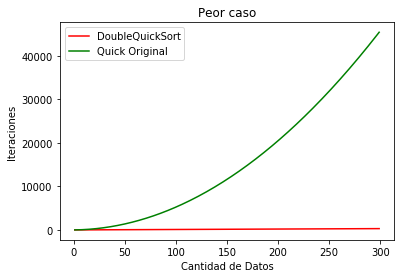

[205, 189, 281, 215, 43, 112, 178, 12, 38, 23, 198, 209, 106, 274, 68, 4, 242, 140, 102, 263, 158, 293, 288, 20, 245, 124, 69, 8, 129, 164, 293, 101, 114, 22, 244, 106, 75, 115, 189, 27, 77, 240, 173, 106, 275, 113, 189, 210, 293, 182, 40, 112, 102, 180, 43, 242, 120, 178, 233, 99, 90, 12, 221, 194, 3, 282, 214, 128, 258, 150, 271, 283, 167, 235, 109, 174, 184, 81, 270, 247, 75, 80, 232, 287, 182, 150, 115, 13, 203, 108, 182, 143, 109, 30, 241, 203, 129, 249, 135, 157, 130, 284, 60, 217, 199, 125, 297, 100, 49, 203, 99, 167, 38, 105, 21, 194, 34, 251, 291, 127, 107, 207, 89, 191, 17, 117, 78, 259, 210, 253, 152, 69, 169, 226, 112, 184, 117, 93, 280, 5, 276, 222, 159, 206, 260, 208, 55, 58, 294, 210, 126, 277, 297, 271, 91, 158, 113, 62, 101, 247, 9, 209, 244, 281, 261, 259, 90, 227, 117, 81, 194, 194, 256, 131, 219, 214, 82, 191, 41, 209, 292, 167, 97, 245, 280, 178, 21, 283, 185, 215, 80, 155, 128, 91, 36, 285, 218, 272, 12, 248, 126, 16, 263, 83, 10, 188, 291, 73, 293, 15, 269, 42, 2

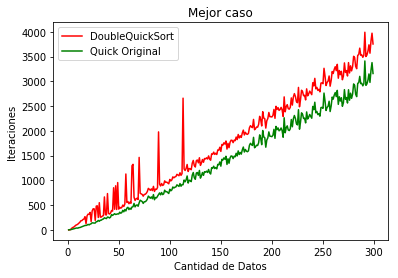

[232, 122, 297, 154, 40, 11, 34, 92, 15, 270, 226, 52, 244, 167, 281, 54, 30, 274, 42, 73, 230, 175, 276, 23, 151, 91, 4, 223, 11, 34, 87, 223, 41, 238, 216, 243, 29, 218, 28, 161, 37, 182, 246, 228, 199, 78, 209, 210, 216, 234, 152, 133, 94, 75, 29, 207, 279, 220, 54, 75, 244, 263, 297, 148, 93, 17, 162, 64, 29, 84, 48, 103, 290, 43, 61, 238, 23, 74, 61, 9, 202, 92, 208, 240, 204, 299, 260, 118, 47, 117, 104, 28, 198, 269, 8, 230, 235, 260, 169, 140, 299, 232, 122, 40, 67, 201, 106, 40, 48, 7, 160, 23, 293, 139, 148, 257, 55, 191, 161, 267, 131, 125, 67, 217, 202, 29, 154, 73, 248, 258, 199, 272, 231, 175, 17, 155, 66, 272, 52, 53, 101, 61, 46, 268, 211, 121, 243, 226, 157, 295, 24, 156, 290, 125, 99, 88, 256, 88, 139, 115, 250, 95, 154, 160, 147, 290, 143, 270, 122, 139, 129, 14, 53, 24, 276, 207, 170, 205, 193, 149, 163, 146, 255, 14, 180, 236, 205, 295, 50, 192, 100, 4, 294, 262, 66, 195, 201, 22, 280, 254, 109, 128, 114, 275, 19, 299, 179, 272, 160, 230, 264, 50, 156, 139, 114, 24

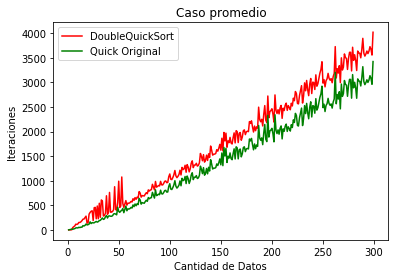

[1, 298, 296, 296, 294, 293, 292, 292, 292, 291, 291, 291, 290, 290, 289, 289, 289, 287, 285, 284, 282, 281, 281, 279, 279, 279, 278, 278, 278, 277, 275, 274, 274, 273, 273, 272, 270, 270, 269, 269, 266, 266, 266, 265, 263, 262, 260, 256, 256, 255, 253, 253, 252, 252, 249, 249, 247, 247, 243, 242, 240, 240, 239, 239, 238, 235, 235, 234, 233, 233, 232, 232, 232, 231, 230, 230, 229, 229, 228, 226, 226, 226, 225, 225, 223, 223, 220, 219, 218, 218, 217, 216, 215, 215, 215, 214, 214, 214, 211, 211, 210, 210, 208, 208, 206, 203, 202, 200, 199, 199, 198, 198, 196, 195, 195, 194, 190, 187, 187, 186, 186, 183, 180, 179, 178, 175, 173, 171, 170, 168, 168, 165, 164, 163, 162, 158, 157, 157, 157, 157, 156, 156, 156, 155, 155, 153, 152, 151, 151, 150, 150, 148, 147, 147, 145, 144, 142, 142, 140, 140, 139, 138, 137, 134, 133, 132, 131, 131, 129, 128, 128, 128, 127, 126, 124, 123, 123, 122, 122, 122, 121, 120, 118, 117, 115, 115, 114, 110, 109, 109, 107, 107, 107, 107, 107, 107, 107, 106, 105, 104, 1

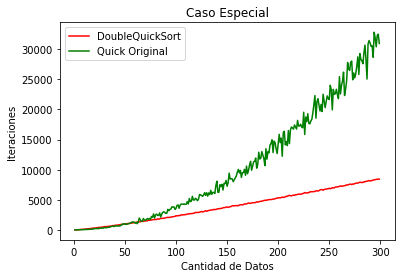

In [76]:
def comparacion(funcion, hector):
    """
    Funcion que permite evaluar distintas opciones a una funcion dada
    """
    color=("r","g","b","k")
    caso=("Peor caso","Mejor caso","Caso promedio","Caso Especial")
    print(funcion.__name__)
    tiempo=[]
    cantidad=[]
    for j in range(4):
        tiempo=[]
        cantidad=[]
        hector_t = []
        normal = []
        for i in range(1,300):
            azar=arregloAlAzar(i)
            if j == 0:#Peor caso
                azar.sort()    
            elif j == 1: #Mejor caso
                copia=copy(azar)
                azar.sort()
                azar.reverse()
                entero=int(float(len(azar)/2))
                numero=azar[entero]
                indice=copia.index(numero)
                #print("h:",obtenerMedio(azar, 0, len(azar) - 1), "-p:",indice)
                copia[len(copia)-1],copia[indice]=copia[indice],copia[len(copia)-1]
                azar=copia
            elif j == 3:
                
                azar.sort()
                azar.reverse()
                ##elemento a invertir
                invelm = 0
                azar[len(azar)-1],azar[invelm]=azar[invelm],azar[len(azar)-1]
                if(i==299):
                    print(azar,"Lista desordenada","azar peor caso")
                    print(entro)
            azarito = copy(azar)
            if(i==299):
                print(azarito,"Lista desordenada")
            tiempo2 = probar_algoritmo(hector,azarito)
            if(i==299):
                print(azarito,"Lista ordenada")
            hector_t.append(tiempo2)
            tiempo1=probar_algoritmo(funcion,azar)
            normal.append(tiempo1)
            tiempo = [hector_t, normal]
            cantidad.append(i)
        graficar_quick(cantidad, tiempo, color[j],caso[j])
        

comparacion(QuickSort, DoubleQuickSort)